# Pre-Processing

Here are a fraction of the packages you will want to use for text processing. 

In [1]:
#Common NLP Toolkit (I mostly use TensorFLow)
#from bs4 import BeautifulSoup #for scraping
import nltk
from nltk.corpus import wordnet, gutenberg, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

import numpy as np

import pandas as pd
#import pickle  #I use this all of the time
#from pprint import pprint

#import spacy #for EMOJIS
#from spacymoji import Emoji #for EMOTICONS
#from emot.emo_unicode import UNICODE_EMOJI #for EMOJIS
#from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

#Text & Number Manipulation
import re
import string
from string import punctuation
from num2words import num2words

#Plotting
import matplotlib
import matplotlib.pyplot as plt #for plotting

#Download Books
nltk.download('gutenberg')

#Initiliaze Lemmatizer, Stopwords Handler, and Wordnet Map (For Later Use)
lemmatizer = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english'))
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\lfult\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


# Read and Verify Text

In [2]:
t=pd.read_csv('c:/users/lfult/documents/titanic/train4NLP.csv', dtype='str')
titanicdf=pd.DataFrame(t['Concatenate'], columns=['Concatenate'])
t2=pd.read_csv('c:/users/lfult/documents/titanic/test4NLP.csv', dtype='str')
testdf=pd.DataFrame(t2['Concatenate'], columns=['Concatenate'])

# Functions for Cleaning
Clean HTML tags (if any)
Remove empty lines
Remove Emoticons
Remove EMOJI
Remove stopwords
Strip punctuation
Lemmatize words

In [3]:
def clean_html(text):
  CLEANR = re.compile("<.*?>:") 
  text = re.sub(CLEANR, ' ', text)
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) #lower case
  return text

def rem_lines(text):
    return text.strip().replace('\n', ' ')

#Handle Emojis and Emoticons
#def convert_emoticons(text):
#    for emot in EMOTICONS_EMO:
#        text = text.replace(emot, EMOTICONS_EMO[emot]+" ".replace("",""))
#    return text

#def convert_emojis(text):
#    for emot in UNICODE_EMOJI:
#        text = text.replace(emot,UNICODE_EMOJI[emot]+" ".replace("",""))
#    return text

def remove_stopwords(text):
    return [word for word in word_tokenize(text) if not word in stopwords]

def strip_punctuation(text):
    return ''.join(c for c in text if c not in punctuation)+' '    

def to_number(text):    
    return(re.sub(r"(\d+)", lambda x: num2words(int(x.group(0))), text))

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return ' '.join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

# Cleaning

In [4]:
#titanic_word=nltk.WordPunctTokenizer().tokenize #Word Punctuation Tokenizer
#titanic_sent = nltk.sent_tokenize(text=t) #Concatenate Tokenizer
#titanicdf=pd.DataFrame(titanic_sent, columns=['Concatenate'])

titanicdf['Concatenate']=titanicdf['Concatenate'].astype(str).apply(to_number)
titanicdf['Concatenate']=titanicdf['Concatenate'].str.lower() #second version of lower case
titanicdf['Concatenate']=titanicdf['Concatenate'].astype(str).apply(clean_html)
#titanicdf['Concatenate']=titanicdf['Concatenate'].astype(str).apply(convert_emoticons)
#titanicdf['Concatenate']=titanicdf['Concatenate'].astype(str).apply(convert_emojis)
titanicdf['Concatenate']=titanicdf['Concatenate'].astype(str).apply(remove_stopwords)
titanicdf['Concatenate']=titanicdf['Concatenate'].astype(str).apply(strip_punctuation)
titanicdf['Concatenate']=titanicdf['Concatenate'].astype(str).apply(lemmatize_words)
titanicdf

testdf['Concatenate']=testdf['Concatenate'].astype(str).apply(to_number)
testdf['Concatenate']=testdf['Concatenate'].str.lower() #second version of lower case
testdf['Concatenate']=testdf['Concatenate'].astype(str).apply(clean_html)
#testdf['Concatenate']=testdf['Concatenate'].astype(str).apply(convert_emoticons)
#testdf['Concatenate']=testdf['Concatenate'].astype(str).apply(convert_emojis)
testdf['Concatenate']=testdf['Concatenate'].astype(str).apply(remove_stopwords)
testdf['Concatenate']=testdf['Concatenate'].astype(str).apply(strip_punctuation)
testdf['Concatenate']=testdf['Concatenate'].astype(str).apply(lemmatize_words)
testdf


,Concatenate
0,three kelly mr james male thirtyfourfive zero ...
1,three wilkes mrs james ellen need female forty...
2,two myles mr thomas francis male sixtytwo zero...
3,three wirz mr albert male twentyseven zero zer...
4,three hirvonen mr alexander helga e lindqvist ...
...,...
413,three spector mr woolf male zero zero afive th...
414,one oliva ocana dona fermina female thirtynine...
415,three saether mr simon sivertsen male thirtyei...
416,three ware mr frederick male zero zero three h...


In [5]:
mylen=len(titanicdf.index)
titanicdf['Survived']=t['Survived']
titanicdf.head(10)

,Concatenate,Survived
0,three braund mr owen harris male twentytwo one...,0
1,one cumings mrs john bradley florence briggs t...,1
2,three heikkinen miss laina female twentysix ze...,1
3,one futrelle mr jacques heath lily may peel fe...,1
4,three allen mr william henry male thirtyfive z...,0
5,three moran mr james male zero zero three hund...,0
6,one mccarthy mr timothy j male fiftyfour zero ...,0
7,three palsson master gosta leonard male two th...,0
8,three johnson mr oscar w elisabeth vilhelmina ...,1
9,two nasser mr nicholas adele achem female four...,1


# Top 10 Words

<AxesSubplot: xlabel='Word'>

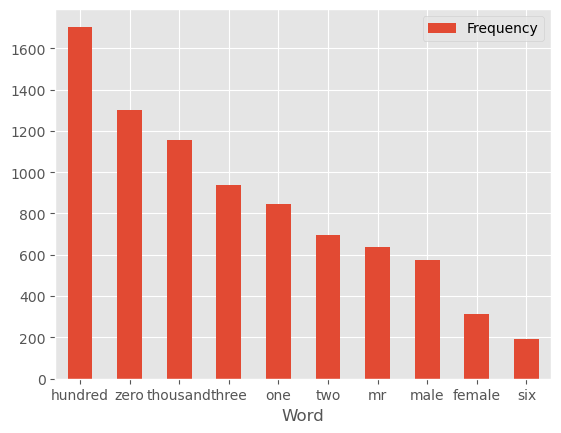

In [6]:
txt = titanicdf.Concatenate.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0)

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split as tts
trainX, testX, trainy, testy,trainLabel, testLabel = tts(titanicdf['Concatenate'], titanicdf['Survived'],titanicdf['Survived'],
                                         test_size=0.2, random_state=42)

testX2=testdf.loc[:,testdf.columns!='Survived']



# Bag of Words Grouping

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score as CVScore
cv = CountVectorizer(binary=True,ngram_range=(1,4),min_df=0.0, max_df=1.0) #how many N-grams do you want?  
cv_train = cv.fit_transform(trainX) #fit transform
cv_test = cv.transform(testX) #just transform using other data
cv_train2=cv.fit_transform(titanicdf['Concatenate'])
cv_test2 = cv.transform(testdf['Concatenate'])

# TF-IDF Grouping

Term frequency–inverse document frequency, is a measure of importance of a word to a document in a collection or corpus, adjusted for the fact that some words appear more frequently in general

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
tv = TFIDF(use_idf=True, min_df=0.0, max_df=1.0)
tv_train = tv.fit_transform(trainX)
tv_test = tv.transform(testX)
tv_train2=tv.fit_transform(titanicdf['Concatenate'])
tv_test2 = tv.transform(testdf['Concatenate'])

# Models

In [10]:
from sklearn.metrics import classification_report as CR
from sklearn.naive_bayes import BernoulliNB as NB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC as SVM
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import Perceptron as P

nb=NB(alpha=.1)
lr=LR(penalty='l2', max_iter=500, C=1, random_state=42)
svm=SVM(penalty='l2', max_iter=50, C=1, random_state=42)
sgd=SGD(loss='hinge', penalty="l2", max_iter=500, random_state=42)
rfc=RFC(n_estimators=50, random_state=42)
gbc=GBC(n_estimators=50, random_state=42)
p=P(tol=1e-3, random_state=0)

models=[nb, lr,svm, sgd, rfc, gbc, p]

def fit(x1,y1,x2,y2):
    for model in models:
        model.fit(x1,y1)
        print(model)
        mypred=model.predict(x2)
        print(CR(mypred, y2))


fit(cv_train,trainLabel, cv_test, testLabel)


BernoulliNB(alpha=0.1)
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.74      0.80      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

LogisticRegression(C=1, max_iter=500, random_state=42)
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       109
           1       0.78      0.83      0.81        70

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.85      0.84      0.84       179

LinearSVC(C=1, max_iter=50, random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.80      0.82      0.81        72

    accuracy                           0.84       179
   ma

In [11]:
fit(tv_train,trainLabel, tv_test, testLabel)

BernoulliNB(alpha=0.1)
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       109
           1       0.77      0.81      0.79        70

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

LogisticRegression(C=1, max_iter=500, random_state=42)
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       124
           1       0.64      0.85      0.73        55

    accuracy                           0.80       179
   macro avg       0.78      0.82      0.79       179
weighted avg       0.84      0.80      0.81       179

LinearSVC(C=1, max_iter=50, random_state=42)
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       115
           1       0.74      0.86      0.80        64

    accuracy                           0.84       179
   ma

# Fit To Unseen Test Data

In [13]:
rfc.fit(cv_train2, titanicdf['Survived'])
print(rfc)
mypred=rfc.predict(cv_test2)

RandomForestClassifier(n_estimators=50, random_state=42)


In [14]:
fdf=pd.DataFrame({'PassengerId': np.arange(892,1310), 'Survived': mypred})
fdf.to_csv('C:/users/lfult/downloads/upload.csv',index=False)